### computer_vision_project.ipynb

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [2]:
import tensorflow_datasets as tfds

## TensorFlow Datasets
### 사전에 만들어 놓은 머신러닝 데이터셋을 모아둔 것

* 텐서로 이미 데이터를 준비
* 잘 준비된 데이터 정리된 데이터로 실습을 할 수 있다
* 여러가지 데이터 불러오는 방법을 실습할 수 있다.
* 텐서플로 버전이 바뀌면서 새롭게 생기거나 변경된 경우에 빠르게 이 데이터셋으로 테스트를 할 수 있다. 

In [3]:
dataset_list = tfds.list_builders()
print("food101" in dataset_list)

True


In [4]:
(train_data, test_data), dataset_info = tfds.load(
    name="food101", # 우리가 사용할 데이터셋 지정
    split=["train", "validation"],  # 데이터셋 나누는 부분
    shuffle_files=True,  # 파일들을 섞어 줄것인지 default = False
    as_supervised=True, # tuple 형태 (data, label) 로 데이터를 다운로드 할 것인지 여부 / False면 dictionary 형태
    with_info=True, # 데이터셋의 메타 정보도 다운로드 (라벨, 샘플의 갯수 등등)
    download=False)

### Windows의 경우 C:\Users\[자신의 아이디]\tensorflow_datasets 에 다운로드 한 후 압축 해제

In [5]:
dataset_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [7]:
class_names = dataset_info.features["label"].names
class_names[:20]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla']

In [8]:
train_one_sample = train_data.take(1) # (image_tensor, label) 왜? as_supervised=True 로 설정을 했기 때문에

In [9]:
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [10]:
type(train_one_sample)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [11]:
for image, label in train_one_sample:
    print(f"Image shape : {image.shape}")
    print(f"Image dtype : {image.dtype}")
    print(f"Target class : {label}")
    print(f"Class name : {class_names[label.numpy()]}")

Image shape : (512, 384, 3)
Image dtype : <dtype: 'uint8'>
Target class : 74
Class name : peking_duck


In [11]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[168, 148, 123],
        [192, 172, 147],
        [200, 180, 155],
        ...,
        [179, 165, 139],
        [188, 172, 147],
        [154, 138, 113]],

       [[184, 164, 139],
        [209, 189, 164],
        [212, 192, 167],
        ...,
        [207, 193, 167],
        [218, 202, 177],
        [184, 168, 143]],

       [[186, 166, 139],
        [214, 194, 167],
        [211, 194, 168],
        ...,
        [207, 193, 167],
        [217, 203, 177],
        [180, 166, 140]],

       ...,

       [[206, 198, 179],
        [236, 228, 209],
        [230, 221, 204],
        ...,
        [226, 214, 200],
        [239, 227, 211],
        [203, 191, 175]],

       [[216, 208, 187],
        [239, 231, 210],
        [233, 225, 206],
        ...,
        [227, 215, 201],
        [237, 225, 209],
        [205, 193, 177]],

       [[173, 165, 144],
        [198, 190, 169],
        [204, 196, 177],
        ...,
        [197, 185, 17

In [12]:
type(image)

tensorflow.python.framework.ops.EagerTensor

In [13]:
image.ndim

3

In [14]:
import tensorflow as tf

In [15]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 383.5, 511.5, -0.5)

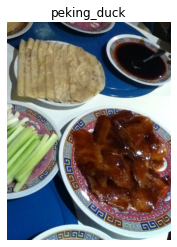

In [16]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [17]:
def preprocess_img(image, label, img_shape = 224):
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32), label

In [18]:
preprocessed_img = preprocess_img(image, label)[0]

In [19]:
print(f"{image[:2]} {image.shape} {image.dtype}")
print(f"{preprocessed_img[:2]} {preprocessed_img.shape} {preprocessed_img.dtype}")

[[[152 129  77]
  [160 137  85]
  [160 137  85]
  ...
  [ 26  21  18]
  [ 24  19  16]
  [ 21  16  13]]

 [[156 133  81]
  [158 135  83]
  [155 132  80]
  ...
  [ 25  20  17]
  [ 23  18  15]
  [ 22  17  14]]] (512, 384, 3) <dtype: 'uint8'>
[[[156.05103  133.05103   81.05102 ]
  [156.13776  133.13776   81.13776 ]
  [146.31122  123.311226  71.311226]
  ...
  [ 22.454105  17.454105  13.668401]
  [ 25.306135  20.306135  17.306135]
  [ 22.25511   17.25511   14.25511 ]]

 [[159.82652  136.82652   82.82653 ]
  [149.79591  126.79591   72.79591 ]
  [132.69388  109.69388   57.26531 ]
  ...
  [ 24.183672  19.183672  15.397966]
  [ 22.21425   17.21425   14.214251]
  [ 18.83164   14.83164   11.83164 ]]] (224, 224, 3) <dtype: 'float32'>


In [20]:
print(f"{image.shape}")
print(f"{preprocessed_img.shape}")

(512, 384, 3)
(224, 224, 3)


In [21]:
print(f"{image.dtype}")
print(f"{preprocessed_img.dtype}")

<dtype: 'uint8'>
<dtype: 'float32'>


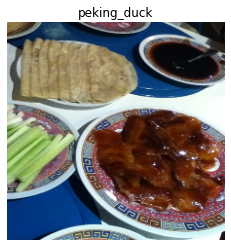

In [22]:
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

### 현재 우리가 가지고 있는 이미지 데이터는 총 101,000개 입니다. (학습용 및 테스트용 모두 합친 것)
### batch를 잘 고려해야하는 상황! => 메모리를 효율적으로 사용할 수 있기 때문에!

### 101,000개 이미지와 라벨 정보를 32개 이미지와 라벨 정보로 구분해서 처리

### tf.data API의 메서드들을 사용!

[tf data API](https://www.tensorflow.org/guide/data_performance)


* map()
* shuffler()
* batch()
* prefetch()
* cache()

## 배치로 처리할 때 고려해야 할 사항
1. 다른 shape의 텐서들을 배치로 처리할 수 없습니다. 이미지 resize와 같은 것을 처리!

2. shuffle()는 섞을 이미지의 수를 유지를 합니다. 이 때 shuffle의 대상은 학습 데이터의 모두 이미지가 대상

   학습 데이터의 크기가 크다면, 메모리에 효율적 사용이 어렵다. 1,000이나 10,000로 사용하는 것도 나쁘지는 않다.


3. num_parallel_calls 파라미터를 사용할 수 있는 메서드에서는 성능을 개선시킬 수 있습니다. num_parallel_calls = tf.data.AUTORUNE 설정!


4. 데이터셋이 메모리게 잘 맞으면 cache()를 사용할 수 없습니다.

![이미지](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/07-prefetching-from-hands-on-ml.png)

## 일반적인 작업 순서
origianl dataset -> map() -> shuffle() -> batch() -> prefetch() -> PrefetchDataset

In [23]:
train_data = train_data.map(
    map_func = preprocess_img,
    num_parallel_calls = tf.data.AUTOTUNE
)

train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(
    map_func = preprocess_img,
    num_parallel_calls = tf.data.AUTOTUNE
)

test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [25]:
checkpoint_path = "model_checkpoint/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor = "val_acc",
    save_best_only = True,
    save_weight_only = True,
    verbose = 0
)

In [26]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy = "mixed_float16")

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


## mixed precision 학습
### 일반적으로 tensorflow의 텐서는 기본적으로 float32 데이터형!
### computer science에서는 float32를 single-precision floating-point 형식, 32비트를 컴퓨터 메모리에서 사용한다는 것을 의미
### GPU에는 제한된 메모리를 가지고 있습니다. 그래서 GPU 동시에 float32 형식의 텐서들만을 처리할 수 있습니다.
### Mixed Precision 학습은 제한된 메모리를 가진 GPU에서 메모리를 더 잘 활용하기 위해 float16, float32을 혼합해서 사용하는 방식입니다.
### float16은 16비트로 숫자를 표현하는 것으로 float32의 메모리 사용의 반으로 숫자를 표현!
### GPU를 활용해서 혼합 정밀도 학습을 사용하면 최대 3배까지 성능을 향상시킬 수 있다.
### GPU 점수가 7.0 이상이어야 혼합 정밀도 학습이 작동합니다.

[Mixed Precision 학습](https://www.tensorflow.org/guide/mixed_precision#supported_hardware)


In [51]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy = "float32") # mixed_float16

In [52]:
mixed_precision.global_policy()

<Policy "float32">

### Callback도 준비해 놓았고,
### Mixed Precision도 설정해 놓았고,
### 이제 모델을 만들면 됩니다.

## 현재 우리 데이터셋은 아주 큽니다. food101은 용량이 5GB정도입니다.
### 전이학습 (EfficientNetB0)으로 fine-tuning을 하려합니다.

### 일반적인 전이학습의 단계
1. feature extraction 모델 구축 (사전 훈련한 모델의 상위 몇 개 레이어 교체)
2. 하위 레이어가 고정된 epoch 동안 학습
3. 필요한 경우 unfrozen으로 레이어의 상태를 바꾸어서 fine-tuning을 실행

In [53]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [54]:
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = layers.Dense(len(class_names))(x)

outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    loss = "sparse_categorical_crossentropy",  # 라벨의 상태가 one-hot encoding 상태가 sparse_categorical_corssentropy
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [55]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_layer (GlobalAverage (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [56]:
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "float32">
pooling_layer True float32 <Policy "float32">
dense_1 True float32 <Policy "float32">
softmax_float32 True float32 <Policy "float32">


In [57]:
for layer in model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_7 False float32 <Policy "float32">
rescaling_6 False float32 <Policy "float32">
normalization_6 False float32 <Policy "float32">
stem_conv_pad False float32 <Policy "float32">
stem_conv False float32 <Policy "float32">
stem_bn False float32 <Policy "float32">
stem_activation False float32 <Policy "float32">
block1a_dwconv False float32 <Policy "float32">
block1a_bn False float32 <Policy "float32">
block1a_activation False float32 <Policy "float32">
block1a_se_squeeze False float32 <Policy "float32">
block1a_se_reshape False float32 <Policy "float32">
block1a_se_reduce False float32 <Policy "float32">
block1a_se_expand False float32 <Policy "float32">
block1a_se_excite False float32 <Policy "float32">
block1a_project_conv False float32 <Policy "float32">
block1a_project_bn False float32 <Policy "float32">
block2a_expand_conv False float32 <Policy "float32">
block2a_expand_bn False float32 <Policy "float32">
block2a_expand_activation False float32 <Policy "float32">


In [59]:
history_101_food_classes_feature_extract = model.fit(
    train_data,
    epochs = 3,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = int(0.15 * len(test_data)),
    callbacks = [
        create_tensorboard_callback("traning_logs", "efficientnetb0_101_classes_all_data_feature_extract"),
        model_checkpoint
    ]
)

TensorBoard 로그 파일을 저장한 디렉토리 : traning_logs/efficientnetb0_101_classes_all_data_feature_extract/20210627-134906
c:\20210626\venv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
Epoch 1/3
2368/2368 [==============================] - 4014s 2s/step - loss: 1.8208 - accuracy: 0.5580 - val_loss: 1.2181 - val_accuracy: 0.6827
Epoch 2/3
2368/2368 [==============================] - 4061s 2s/step - loss: 1.2939 - accuracy: 0.6663 - val_loss: 1.1368 - val_accuracy: 0.7005
Epoch 3/3
2368/2368 [==============================] - 4182s 2s/step - loss: 1.1437 - accuracy: 0.7026 - val_loss: 1.0840 - val_accuracy: 0.7034


In [ ]:
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

In [60]:
## 잘 만들 모델이 있다!

In [ ]:
cloned_model = tf.keras.models.clone_model(model)
cloned_model.summary()

In [ ]:
checkpoint_path

In [ ]:
cloned_model.load_weights(checkpoint_path)

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",  # 라벨의 상태가 one-hot encoding 상태가 sparse_categorical_corssentropy
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
results_feature_extract_model_with_loaded_weights = cloned_model.evaluate(test_data)

In [ ]:
import numpy as np
assert np.isclose(
    results_feature_extract_model,
    results_feature_extract_model_with_loaded_weights    
).all()

In [ ]:
for layer in cloned_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
save_dir = "efficientnetb0_feature_extract_model"
model.save(save_dir)

In [ ]:
# 저장한 모델을 가져와기

In [ ]:
# dtype_policy를 유지하고 있는지 확인

In [ ]:
# 불러온 모델의 성능을 확인해보세요!

In [ ]:
# 불러온 모델의 성능이 이전 모델의 성능과 같은 비교